# Comparación de Resultados de Modelos de Generación de Datos Sintéticos
Este notebook tiene como objetivo analizar y comparar los resultados obtenidos al aplicar diferentes técnicas de generación de datos sintéticos: SMOTE-NC, CTGAN, y VAE, junto con un modelo base que no utiliza técnicas de balanceo (Sin Balanceo). Además, se calcula el promedio de las métricas clave por enfoque y modelo para identificar cuál técnica genera datos más efectivos en términos de rendimiento de los clasificadores.

In [ ]:
# Importar las bibliotecas necesarias para manipulación de datos y visualización
import pandas as pd
import matplotlib.pyplot as plt

# 1. Carga de Datasets de Resultados
Cargar los datasets desde archivos CSV generados previamente

In [3]:
# Cargar los CSV
resultados_smote = pd.read_csv('resultados_clasificadores_smote_nc.csv')
resultados_ctgan = pd.read_csv('resultados_clasificadores_ctgan.csv')
resultados_vae = pd.read_csv('resultados_clasificadores_vae.csv')
resultados_sin_balanceo = pd.read_csv('resultados_clasificadores_sin_balanceo.csv')

# Añadir una columna para identificar el enfoque
resultados_smote['Enfoque'] = 'SMOTE'
resultados_ctgan['Enfoque'] = 'CTGAN'
resultados_vae['Enfoque'] = 'VAE'
resultados_sin_balanceo['Enfoque'] = 'Sin Balanceo'

# Combinar todos los resultados en un solo DataFrame
resultados_combinados = pd.concat([resultados_smote, resultados_ctgan, resultados_vae, resultados_sin_balanceo], ignore_index=True)

# Mostrar los primeros resultados combinados
resultados_combinados

,Modelo,Accuracy,Recall,F1-Score,AUC-ROC,Specificity,MCC,Enfoque
0,Random Forest,0.961039,0.863636,0.926829,0.986364,1.000000,0.904967,SMOTE
1,MLP,0.909091,0.909091,0.851064,0.975207,0.909091,0.789352,SMOTE
2,Logistic Regression,0.922078,0.909091,0.869565,0.962810,0.927273,0.815726,SMOTE
3,Random Forest,0.948052,0.909091,0.909091,0.987190,0.963636,0.872727,CTGAN
4,MLP,0.909091,0.954545,0.857143,0.971901,0.890909,0.800417,CTGAN
5,Logistic Regression,0.844156,0.863636,0.760000,0.930579,0.836364,0.657376,CTGAN
6,Random Forest,0.545455,0.681818,0.461538,0.638430,0.490909,0.157138,VAE
7,MLP,0.571429,0.636364,0.459016,0.665702,0.545455,0.164288,VAE
8,Logistic Regression,0.649351,0.545455,0.470588,0.672314,0.690909,0.220371,VAE
9,Random Forest,0.948052,0.863636,0.904762,0.987190,0.981818,0.871025,Sin Balanceo


In [4]:
# Obtener el promedio de las métricas por enfoque y clasificador
promedio_por_enfoque = resultados_combinados.groupby(['Enfoque', 'Modelo']).mean().reset_index()

# Mostrar el resultado
promedio_por_enfoque


,Enfoque,Modelo,Accuracy,Recall,F1-Score,AUC-ROC,Specificity,MCC
0,CTGAN,Logistic Regression,0.844156,0.863636,0.760000,0.930579,0.836364,0.657376
1,CTGAN,MLP,0.909091,0.954545,0.857143,0.971901,0.890909,0.800417
2,CTGAN,Random Forest,0.948052,0.909091,0.909091,0.987190,0.963636,0.872727
3,SMOTE,Logistic Regression,0.922078,0.909091,0.869565,0.962810,0.927273,0.815726
4,SMOTE,MLP,0.909091,0.909091,0.851064,0.975207,0.909091,0.789352
5,SMOTE,Random Forest,0.961039,0.863636,0.926829,0.986364,1.000000,0.904967
6,Sin Balanceo,Logistic Regression,0.922078,0.909091,0.869565,0.970248,0.927273,0.815726
7,Sin Balanceo,MLP,0.922078,0.909091,0.869565,0.980992,0.927273,0.815726
8,Sin Balanceo,Random Forest,0.948052,0.863636,0.904762,0.987190,0.981818,0.871025
9,VAE,Logistic Regression,0.649351,0.545455,0.470588,0.672314,0.690909,0.220371


In [ ]:
# Comparar AUC-ROC para cada enfoque y clasificador
plt.figure(figsize=(10, 6))
ax_auc = sns.barplot(x='Modelo', y='AUC-ROC', hue='Enfoque', data=resultados_combinados)
plt.title('Comparación de AUC-ROC por Clasificador y Enfoque')
plt.ylabel('AUC-ROC')
add_value_labels(ax_auc)  # Añadir etiquetas de los valores a las barras
plt.show()

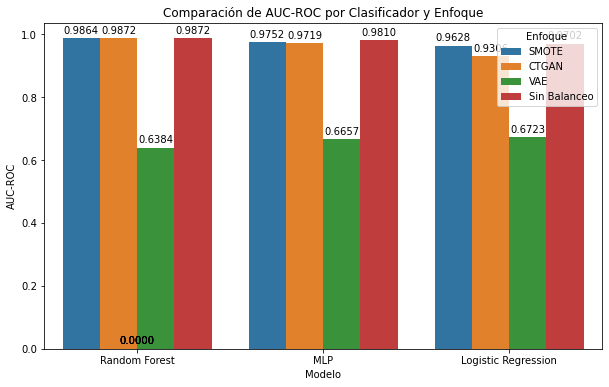

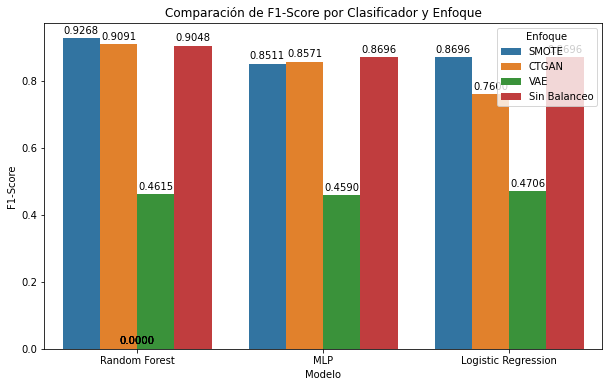

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Función para añadir etiquetas a las barras
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                    textcoords='offset points')

In [ ]:
# Comparar F1-Score para cada enfoque y clasificador
plt.figure(figsize=(10, 6))
ax_f1 = sns.barplot(x='Modelo', y='F1-Score', hue='Enfoque', data=resultados_combinados)
plt.title('Comparación de F1-Score por Clasificador y Enfoque')
plt.ylabel('F1-Score')
add_value_labels(ax_f1)  # Añadir etiquetas de los valores a las barras
plt.show()